In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("C:/Dataset-DS/Churn_Modelling.csv")

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.drop(columns = ['RowNumber','CustomerId','Surname'],inplace=True)

In [5]:
df = pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True)

In [6]:
X = df.drop(columns=['Exited'])
y = df['Exited'].values

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_trf = scaler.fit_transform(X_train)
X_test_trf = scaler.transform(X_test)

In [9]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [91]:
model = Sequential(
    [
        Dense(11, activation='relu', input_dim = 11),
        Dense(11, activation='relu', input_dim = 11),
        Dense(1, activation='sigmoid')
    ]
)

C:\Users\91755\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [92]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 1)              │            12 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 276 (1.08 KB)

 Trainable params: 276 (1.08 KB)

 Non-trainable params: 0 (0.00 B)

In [108]:
model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [109]:
history = model.fit(X_train_trf, y_train, epochs=40, validation_split=0.2)

Epoch 1/40
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7958 - loss: 9257.2891 - val_accuracy: 0.7969 - val_loss: 9260.8525
Epoch 2/40
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7958 - loss: 8809.8809 - val_accuracy: 0.7969 - val_loss: 8830.9277
Epoch 3/40
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7958 - loss: 8384.5186 - val_accuracy: 0.7969 - val_loss: 8411.8027
Epoch 4/40
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7958 - loss: 7976.9082 - val_accuracy: 0.7969 - val_loss: 8009.5537
Epoch 5/40
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7958 - loss: 7571.4487 - val_accuracy: 0.7969 - val_loss: 7593.1362
Epoch 6/40
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7958 - loss: 7147.8555 - val_accuracy: 0.7969 - val_loss: 7162.4692
Epoch 7/40
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7958 - loss: 6723.2920 - val_accuracy: 0.7969 - val_loss: 6736.0942
Epoch 8/40
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy

In [110]:
model.layers[0].get_weights()

[array([[ -4.3567877 ,   6.428977  ,   2.5832605 ,  -4.674581  ,
           6.8891673 ,  -3.876285  ,  -4.6853547 ,   2.1931138 ,
           3.9919543 ,  -2.399145  ,   4.215453  ],
        [-10.226085  , -10.702903  , -11.673688  , -11.387991  ,
          -7.8392186 , -12.164948  , -11.731505  , -11.22314   ,
         -10.593385  , -11.063931  ,  -9.828837  ],
        [  4.909439  ,  -1.8576146 ,  -2.7498617 ,  -0.196681  ,
          -1.044971  ,  -2.3432505 ,  -1.311082  ,  -1.91265   ,
           4.940422  ,   6.221919  ,   5.250081  ],
        [ -8.742322  ,  -7.694166  ,  -8.556512  ,  -8.226073  ,
           7.163321  ,  -8.010334  ,  -8.3625345 ,  -6.707892  ,
          -8.070706  ,  -8.672695  ,  -8.198073  ],
        [  5.611962  ,   7.3847594 ,   4.8198    ,   7.8151655 ,
          -4.992985  ,   6.1072955 ,   6.9003377 ,   7.08868   ,
           5.6396556 ,   7.0416245 ,   6.1454606 ],
        [ -1.7934822 ,  -2.0624452 ,   0.33444437,  -2.195018  ,
           3.1978214 ,  -

In [111]:
y_log = model.predict(X_test_trf)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step  


In [112]:
import numpy as np

In [113]:
y_pred = np.where(y_log > 0.5, 1 , 0)

In [114]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.7935

In [115]:
import matplotlib.pyplot as plt

In [116]:
history.history # gives matrix 

{'accuracy': [0.7957812547683716,
  0.7957812547683716,
  0.7957812547683716,
  0.7957812547683716,
  0.7957812547683716,
  0.7957812547683716,
  0.7957812547683716,
  0.7957812547683716,
  0.7957812547683716,
  0.7957812547683716,
  0.7957812547683716,
  0.7957812547683716,
  0.7957812547683716,
  0.7957812547683716,
  0.7957812547683716,
  0.7957812547683716,
  0.7957812547683716,
  0.7957812547683716,
  0.7957812547683716,
  0.7957812547683716,
  0.7957812547683716,
  0.8003125190734863,
  0.8018749952316284,
  0.8031250238418579,
  0.7868750095367432,
  0.7076562643051147,
  0.6932812333106995,
  0.6890624761581421,
  0.6962500214576721,
  0.7015625238418579,
  0.7054687738418579,
  0.717968761920929,
  0.7185937762260437,
  0.729687511920929,
  0.7310937643051147,
  0.7371875047683716,
  0.7450000047683716,
  0.75,
  0.7432812452316284,
  0.7410937547683716],
 'loss': [9257.2890625,
  8809.880859375,
  8384.5185546875,
  7976.908203125,
  7571.44873046875,
  7147.85546875,
  6723.

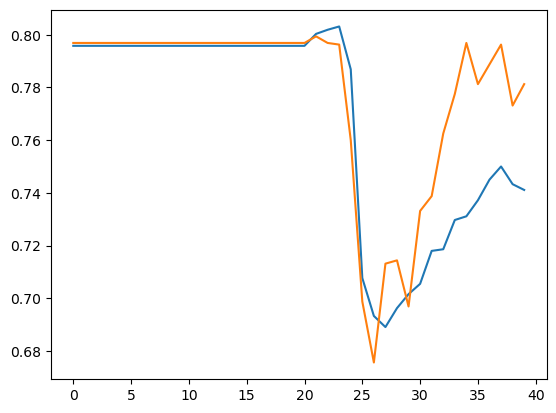

In [117]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])